In [33]:
using Flux, Plots

Sigmoid Function

In [34]:
?σ

"σ" can be typed by \sigma<tab>

search: σ logσ hardσ



```
σ(x) = 1 / (1 + exp(-x))
```

Classic [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) activation function.


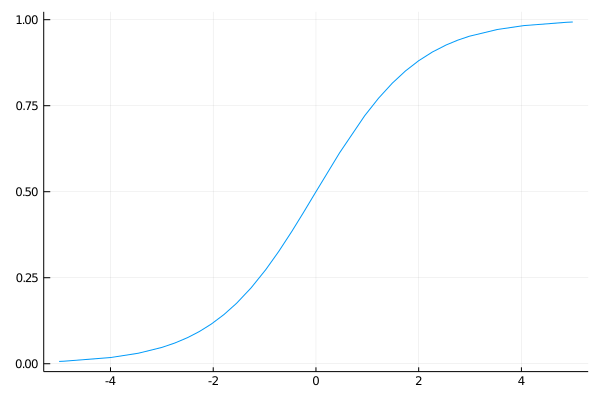

In [35]:
plot(σ, legend=false)

Neural Networks

In [36]:
model = Dense(2, 1, σ)

Dense(2, 1, σ)

In [37]:
println(model.W)
println(model.b)

Float32[-0.42133597 0.5934526]
Float32[0.0]


In [38]:
x = rand(2)
model(x)

1-element Array{Float32,1}:
 0.55293584

In [39]:
σ.(model.W*x + model.b)

1-element Array{Float64,1}:
 0.5529358403267961

Loss Functions

In [40]:
methods(Flux.mse)

# 1 method for generic function "mse":
[1] mse(ŷ, y) in Flux at /home/sahil/.julia/packages/Flux/Fj3bt/src/layers/stateless.jl:23

**Image Classification with Basic MLP**

In [41]:
using CSV, DataFrames

In [42]:
apples = DataFrame(CSV.File("data/apples.dat", delim="\t", normalizenames=true))
bananas = DataFrame(CSV.File("data/bananas.dat", delim="\t", normalizenames=true))

,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,98,99,0.583507,0.500662,0.207504
2,50,99,0.609666,0.514869,0.186871
3,52,99,0.610012,0.515759,0.187504
4,99,69,0.568033,0.492939,0.239316
5,51,99,0.609766,0.51485,0.183329
6,53,99,0.608089,0.514609,0.183374
7,53,99,0.608676,0.515487,0.186206
8,53,99,0.609278,0.516486,0.188582
9,99,67,0.569099,0.494501,0.241941


In [43]:
x_apples = [[row.red, row.green] for row in eachrow(apples)]
x_bananas = [[row.red, row.green] for row in eachrow(bananas)]

490-element Array{Array{Float64,1},1}:
 [0.5835067538126356, 0.500662309368192]
 [0.6096658836445241, 0.514868541076373]
 [0.61001222127424, 0.5157592947018083]
 [0.5680333392636676, 0.4929391278094967]
 [0.6097662880271572, 0.5148498882514222]
 [0.6080886893475433, 0.5146088965412025]
 [0.6086763977507786, 0.5154866998805462]
 [0.6092775365179625, 0.5164860873506747]
 [0.5690986557452848, 0.4945007761667278]
 [0.610284435646972, 0.5161825666623635]
 [0.607329117213896, 0.5153440757746397]
 [0.6083665640474657, 0.5146497517166334]
 [0.6063312071816673, 0.5137782965773128]
 ⋮
 [0.5291302161890399, 0.4403100385453329]
 [0.5287307644576823, 0.4565478406552493]
 [0.5240277326400172, 0.45237940480059413]
 [0.5239057876671794, 0.4525711129522229]
 [0.5238233433790978, 0.45140008185437314]
 [0.5224889335097888, 0.44997337957681116]
 [0.5175726263709806, 0.4443909309164674]
 [0.5159556048834634, 0.4419119496855347]
 [0.5175850178187539, 0.44482679017155075]
 [0.5103568171454631, 0.436022286821

In [44]:
X = [x_apples; x_bananas]
y = [fill(0, size(x_apples)); fill(1, size(x_bananas))]

982-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 ⋮
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [45]:
model = Dense(2, 1, σ)

Dense(2, 1, σ)

In [46]:
model(X[1])

1-element Array{Float32,1}:
 0.60165817

In [47]:
loss = Flux.mse(model(X[1]), y[1])

0.36199254f0

In [48]:
?Flux.train!

```
train!(loss, params, data, opt; cb)
```

For each datapoint `d` in `data` compute the gradient of `loss(d...)` through backpropagation and call the optimizer `opt`.

In case datapoints `d` are of numeric array type, assume no splatting is needed and compute the gradient of `loss(d)`.

A callback is given with the keyword argument `cb`. For example, this will print "training" every 10 seconds (using [`Flux.throttle`](@ref)):

train!(loss, params, data, opt,          cb = throttle(() -> println("training"), 10))

The callback can call [`Flux.stop`](@ref) to interrupt the training loop.

Multiple optimisers and callbacks can be passed to `opt` and `cb` as arrays.


In [49]:
params(model)

Params([Float32[0.97591126 -0.3358308], Float32[0.0]])

In [50]:
model = Dense(2, 1, σ)
L(x,y) = Flux.mse(model(x), y)
ps = params(model)
opt = ADAM()
Flux.train!(L, ps, zip(X, y), opt)

In [51]:
for step in 1:100
    Flux.train!(L, ps, zip(X, y), opt)
end

**Multiclassification Task**

In [52]:
apples = DataFrame(CSV.File("data/apples.dat", delim="\t", normalizenames=true))[1:490, :]
grapes = DataFrame(CSV.File("data/grapes.dat", delim="\t", normalizenames=true))

,height,width,red,green,blue
,Int64,Int64,Float64,Float64,Float64
1,98,84,0.615648,0.625358,0.435313
2,98,84,0.623257,0.64083,0.463301
3,99,83,0.622386,0.640902,0.463111
4,99,83,0.622452,0.64107,0.463373
5,99,84,0.621801,0.641156,0.462681
6,99,84,0.622526,0.641055,0.463552
7,99,84,0.622833,0.641057,0.465057
8,99,84,0.622422,0.64084,0.463884
9,99,85,0.61479,0.623654,0.435193


In [53]:
x_apples = [[i.red, i.blue] for i in eachrow(apples)]
x_bananas = [[i.red, i.blue] for i in eachrow(bananas)]
x_grapes = [[i.red, i.blue] for i in eachrow(grapes)]
X = vcat(x_apples, x_bananas, x_grapes)
y = vcat(fill([1,0,0], size(x_apples)), fill([0,1,0], size(x_bananas)), fill([0,0,1], size(x_grapes)))

1470-element Array{Array{Int64,1},1}:
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 ⋮
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]
 [0, 0, 1]

In [54]:
#Store one hot vectors as ints instead of arrays
using Flux: onehot
dump(onehot(2, 1:8))

Flux.OneHotVector
  ix: UInt32 0x00000002
  of: UInt32 0x00000008


In [55]:
y = vcat(fill(onehot(1, 1:3), size(x_apples)),
         fill(onehot(2, 1:3), size(x_bananas)),
         fill(onehot(1, 1:3), size(x_grapes)))

1470-element Array{Flux.OneHotVector,1}:
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 ⋮
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]
 [1, 0, 0]

In [56]:
model = Dense(2, 3, σ)
L(x,y) = Flux.mse(model(x),y)
opt = ADAM()
Flux.train!(L, params(model), zip(X,y), opt)

In [57]:
for _ in 1:100
    Flux.train!(L, params(model), zip(X,y), opt)
end

This model is not complex enough to properly classify the images. Let's try deep neural networks

In [58]:
layer1 = Dense(2, 4, σ)
layer2 = Dense(4, 3, σ)

Dense(4, 3, σ)

In [59]:
layer1(X[1])
layer2(layer1(X[1]))

3-element Array{Float32,1}:
 0.59881485
 0.6326986
 0.36871278

In [60]:
?Chain

search: Chain batched_adjoint channelview



```
Chain(layers...)
```

Chain multiple layers / functions together, so that they are called in sequence on a given input.

`Chain` also supports indexing and slicing, e.g. `m[2]` or `m[1:end-1]`. `m[1:3](x)` will calculate the output of the first three layers.

# Examples

```jldoctest
julia> m = Chain(x -> x^2, x -> x+1);

julia> m(5) == 26
true

julia> m = Chain(Dense(10, 5), Dense(5, 2));

julia> x = rand(10);

julia> m(x) == m[2](m[1](x))
true
```


In [61]:
m = Chain(layer1, layer2)
m(X[1])

3-element Array{Float32,1}:
 0.59881485
 0.6326986
 0.36871278

In [62]:
#Piping can also work
X[1] |> layer1 |> layer2

3-element Array{Float32,1}:
 0.59881485
 0.6326986
 0.36871278

In [63]:
opt

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}(Float32[-2.8963506 5.327563; 2.5654883 -5.171878; -7.406034 -5.0119424] => (Float32[-0.013890686 -0.009885846; 0.014009194 0.009972363; 3.4740987f-13 2.473301f-13], Float32[0.0011509263 0.00022123307; 0.0011568493 0.0002229552; 6.059507f-22 3.8509712f-23], (2.5e-323, 3.073281911462156e-65)),Float32[0.7905926, -0.6529338, -7.321782] => (Float32[-0.023234058, 0.02343321, 5.818148f-13], Float32[0.0037748665, 0.0037939355, 3.3200415f-21], (2.5e-323, 3.073281911462156e-65))))

In [64]:
model = Chain(Dense(2, 4, σ), Dense(4, 3, σ))
L(x, y) = Flux.mse(model(x), y)
ps = Flux.params(model)
opt = ADAM()
@time Flux.train!(L, ps, zip(X, y), opt)

  0.742131 seconds (1.88 M allocations: 82.767 MiB)


Use batching to improve efficiency

In [65]:
Flux.batch(X)

2×1470 Array{Float64,2}:
 0.501466  0.434225  0.43412   0.432922  …  0.592942  0.593707  0.5919
 0.148436  0.108166  0.108348  0.106358     0.454372  0.453736  0.451744

In [66]:
model(Flux.batch(X))

3×1470 Array{Float32,2}:
 0.724334   0.721234   0.721224   …  0.724508   0.724558   0.72449
 0.311628   0.317215   0.317201      0.287245   0.287264   0.287416
 0.0851001  0.0848572  0.0848515     0.0807318  0.0807543  0.0807609

In [67]:
databatch = (Flux.batch(X), Flux.batch(y))
@time Flux.train!(L, ps, (databatch,), opt)
@time Flux.train!(L, ps, (databatch,), opt)

  2.604219 seconds (6.35 M allocations: 309.159 MiB, 3.75% gc time)
  0.001008 seconds (15.11 k allocations: 553.266 KiB)


In [36]:
for _ in 1:10000
    Flux.train!(L, ps, (databatch,), opt)
end

Cross entropy would be a better loss function as the graph below shows since it would more heavily penalize wrong answers

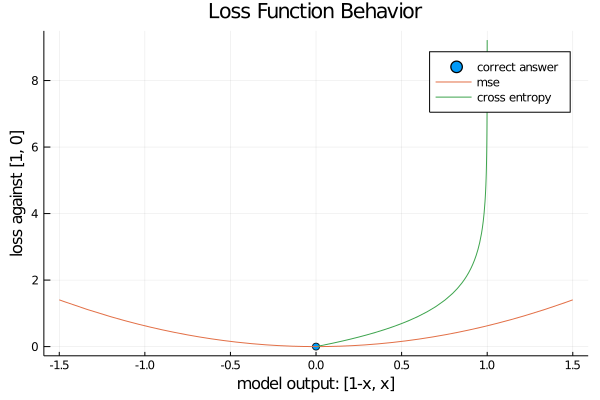

In [68]:
scatter([0],[0], label="correct answer", xlabel="model output: [1-x, x]")
plot!(x->Flux.mse([1-x, x/2], [1,0]), -1.5, 1.5, label="mse")
plot!(x->Flux.crossentropy([1-x, x/2], [1,0]), 0, 1, label="cross entropy")
xlabel!("model output: [1-x, x]")
ylabel!("loss against [1, 0]")
title!("Loss Function Behavior")

In [69]:
println(Flux.mse([0.98, 0.01, 0.01], [1.0,0,0]))
Flux.mse([0.01,0.98,0.01], [1.0,0,0])

0.00020000000000000025


0.6468666666666666

In [70]:
println(Flux.crossentropy([0.98, 0.01, 0.01], [1.0,0,0]))
Flux.crossentropy([0.01,0.98,0.01], [1.0,0,0])

0.020202707317519466


4.605170185988091

Softmax converts losses to probabilities

In [71]:
softmax(model(X[1]))

3-element Array{Float32,1}:
 0.45701635
 0.30202326
 0.24096036

In [72]:
sum(softmax(model(X[1])))

1.0f0

In [73]:
model = Chain(Dense(2, 4, σ), Dense(4, 3, identity), softmax)
ps = params(model)
L(x,y) = Flux.crossentropy(model(x), y)
opt = ADAM()
Flux.train!(L, ps, Iterators.repeated(databatch, 5000), opt)

**Handwritten Recognition Example**

In [74]:
using Flux.Data.MNIST, Images, ImageMagick, ImageIO

In [75]:
labels = MNIST.labels();
images = MNIST.images();

In [76]:
length(labels)

60000

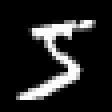

In [77]:
images[1]

In [78]:
size(images[1])

(28, 28)

In [79]:
Float64.(images[1])

28×28 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.498039  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.25098   0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0       …  0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0       0.0          0.0       0.0  0.0  0.0  0.0
 ⋮                         

In [80]:
n_inputs = unique(length.(images))[]

784

In [81]:
n_outputs = length(unique(labels))

10

In [82]:
preprocess(img) = vec(Float64.(img))

preprocess (generic function with 1 method)

In [83]:
X = preprocess.(images[1:5000])

5000-element Array{Array{Float64,1},1}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0

In [84]:
y = [Flux.onehot(label, 0:9) for label in labels[1:5000]]

5000-element Array{Flux.OneHotVector,1}:
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [85]:
function create_batch(r)
    X = [preprocess(img) for img in images[r]]
    y = [Flux.onehot(label, 0:9) for label in labels[r]]
    return (Flux.batch(X), Flux.batch(y))
end

create_batch (generic function with 1 method)

In [86]:
trainbatch = create_batch(1:5000);

One layer

In [87]:
model = Chain(Dense(n_inputs, n_outputs, identity), softmax)
ps = params(model)
L(x,y) = Flux.crossentropy(model(x), y)
opt = ADAM()
@time Flux.train!(L, ps, [trainbatch], opt)
@time Flux.train!(L, ps, [trainbatch], opt)

  1.349642 seconds (20.38 M allocations: 410.946 MiB, 5.78% gc time)
  0.826094 seconds (19.75 M allocations: 379.567 MiB, 5.15% gc time)


In [88]:
Iterators.repeated(trainbatch, 100);

In [89]:
L(trainbatch...)

2.331337f0

In [90]:
@time Flux.train!(L, ps, [trainbatch], opt)

  0.823166 seconds (19.75 M allocations: 379.567 MiB, 5.13% gc time)


In [91]:
L(trainbatch...)

2.2781827f0

Using callbacks

In [92]:
callback() = @show(L(trainbatch...))
Flux.train!(L, ps, Iterators.repeated(trainbatch, 3), opt; cb=callback)

L(trainbatch...) = 2.226663f0
L(trainbatch...) = 2.1766834f0
L(trainbatch...) = 2.1281548f0


In [93]:
Flux.train!(L, ps, Iterators.repeated(trainbatch, 40), opt; cb=Flux.throttle(callback, 1))

L(trainbatch...) = 2.08099f0
L(trainbatch...) = 1.904486f0
L(trainbatch...) = 1.7452328f0
L(trainbatch...) = 1.6023773f0
L(trainbatch...) = 1.4758562f0
L(trainbatch...) = 1.364886f0
L(trainbatch...) = 1.2680519f0
L(trainbatch...) = 1.1837422f0
L(trainbatch...) = 1.1277382f0
L(trainbatch...) = 1.061451f0
L(trainbatch...) = 1.0034667f0


In [94]:
testbatch = create_batch(5001:10000);

In [95]:
using Printf
train_loss = []
test_loss = []
function update_loss!()
    train_val = L(trainbatch...)
    test_val = L(testbatch...)
    push!(train_loss, train_val)
    push!(test_loss, test_val)
    @printf("train loss = %.2f, test loss=%.2f\n", train_val, test_val)
end

update_loss! (generic function with 1 method)

In [65]:
Flux.train!(L, ps, Iterators.repeated(trainbatch, 1000), opt; cb=Flux.throttle(update_loss!, 1))

train loss = 0.95, test loss=0.98
train loss = 0.92, test loss=0.95
train loss = 0.88, test loss=0.91
train loss = 0.84, test loss=0.87
train loss = 0.80, test loss=0.84
train loss = 0.77, test loss=0.81
train loss = 0.75, test loss=0.79
train loss = 0.73, test loss=0.77
train loss = 0.71, test loss=0.75
train loss = 0.68, test loss=0.73
train loss = 0.67, test loss=0.71
train loss = 0.65, test loss=0.69
train loss = 0.63, test loss=0.68
train loss = 0.62, test loss=0.66
train loss = 0.61, test loss=0.65
train loss = 0.59, test loss=0.64
train loss = 0.58, test loss=0.63
train loss = 0.57, test loss=0.62
train loss = 0.56, test loss=0.61
train loss = 0.55, test loss=0.60
train loss = 0.54, test loss=0.59
train loss = 0.53, test loss=0.59
train loss = 0.52, test loss=0.58
train loss = 0.52, test loss=0.57
train loss = 0.51, test loss=0.57
train loss = 0.50, test loss=0.56
train loss = 0.50, test loss=0.55
train loss = 0.49, test loss=0.55
train loss = 0.48, test loss=0.54
train loss = 0

train loss = 0.18, test loss=0.36
train loss = 0.18, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0.17, test loss=0.36
train loss = 0

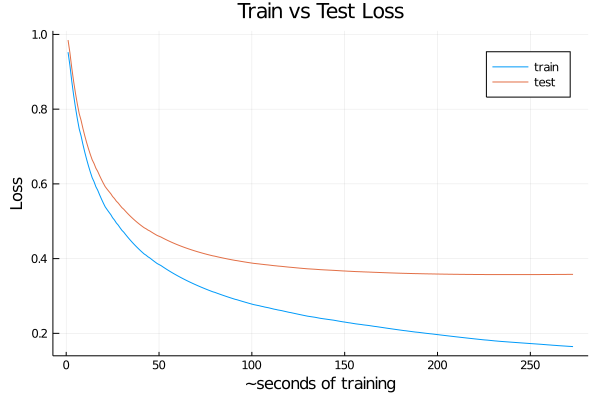

In [66]:
plot(1:length(train_loss), train_loss, xlabel="~seconds of training", label="train")
plot!(1:length(test_loss), test_loss, label="test")
title!("Train vs Test Loss")
ylabel!("Loss")

Evaluation

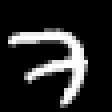

(7, (0.18869843f0, 7))

In [26]:
i = 5001
display(images[i])
labels[i], findmax(model(preprocess(images[i]))) .- (0,1)

In [68]:
model(preprocess(images[i]))

10-element Array{Float32,1}:
 2.0329588f-5
 1.8282895f-5
 0.20669034
 0.020154445
 0.00014179347
 2.0891423f-6
 1.5063041f-5
 0.7669323
 0.0016766522
 0.0043487665

In [106]:
prediction(i) = findmax(model(preprocess(images[i])))[2] - 1

prediction (generic function with 1 method)

In [70]:
sum(prediction(i) == labels[i] for i in 1:5000)/5000

0.9648

In [71]:
sum(prediction(i) == labels[i] for i in 5001:10000)/5000

0.8948

Hidden Layer and ReLU Activation

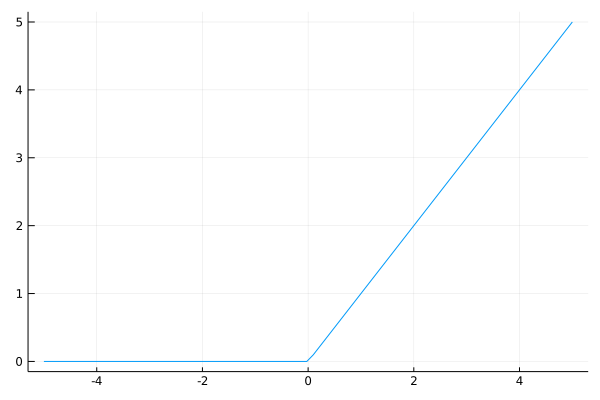

In [96]:
plot(relu, legend=false)

In [97]:
n_hidden = 20
model = Chain(Dense(n_inputs, n_hidden, relu), Dense(n_hidden, n_outputs, identity), softmax)
ps = params(model)
L(x,y) = Flux.crossentropy(model(x),y)
opt = ADAM()

ADAM(0.001, (0.9, 0.999), IdDict{Any,Any}())

In [98]:
Flux.train!(L, ps, [trainbatch], opt)

In [99]:
train_loss = []
test_loss = []
Flux.train!(L, ps, Iterators.repeated(trainbatch, 1000), opt; cb=Flux.throttle(update_loss!, 1))

train loss = 2.29, test loss=2.29
train loss = 2.10, test loss=2.10
train loss = 1.93, test loss=1.94
train loss = 1.76, test loss=1.77
train loss = 1.59, test loss=1.60
train loss = 1.45, test loss=1.46
train loss = 1.32, test loss=1.34
train loss = 1.20, test loss=1.22
train loss = 1.12, test loss=1.14
train loss = 1.05, test loss=1.07
train loss = 0.97, test loss=0.99
train loss = 0.89, test loss=0.92
train loss = 0.82, test loss=0.86
train loss = 0.76, test loss=0.80
train loss = 0.71, test loss=0.75
train loss = 0.67, test loss=0.71
train loss = 0.63, test loss=0.68
train loss = 0.60, test loss=0.65
train loss = 0.57, test loss=0.62
train loss = 0.54, test loss=0.59
train loss = 0.52, test loss=0.57
train loss = 0.49, test loss=0.55
train loss = 0.48, test loss=0.54
train loss = 0.46, test loss=0.52
train loss = 0.44, test loss=0.51
train loss = 0.43, test loss=0.50
train loss = 0.41, test loss=0.48
train loss = 0.40, test loss=0.47
train loss = 0.39, test loss=0.46
train loss = 0

InterruptException: InterruptException:

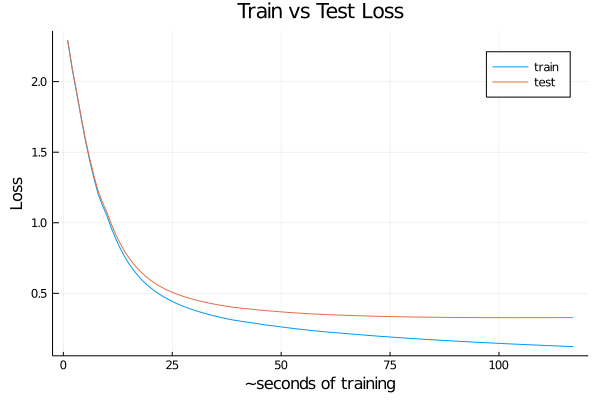

In [105]:
plot(1:length(train_loss), train_loss, xlabel="~seconds of training", label="train")
plot!(1:length(test_loss), test_loss, label="test")
title!("Train vs Test Loss")
ylabel!("Loss")

In [107]:
sum(prediction(i) == labels[i] for i in 1:5000)/5000

0.9718

In [108]:
sum(prediction(i) == labels[i] for i in 5001:10000)/5000

0.9072

Convolutional Neural Net

In [101]:
?Conv

search: Conv conv conv! convert ConvDims convexhull ConvTranspose ∇conv_data



```
Conv(size, in => out, σ = identity; init = glorot_uniform,
     stride = 1, pad = 0, dilation = 1)
```

Standard convolutional layer. `size` should be a tuple like `(2, 2)`. `in` and `out` specify the number of input and output channels respectively.

Data should be stored in WHCN order (width, height, # channels, batch size). In other words, a 100×100 RGB image would be a `100×100×3×1` array, and a batch of 50 would be a `100×100×3×50` array.

# Examples

Apply a `Conv` layer to a 1-channel input using a 2×2 window size, giving us a 16-channel output. Output is activated with ReLU.

```julia
size = (2,2)
in = 1
out = 16
Conv(size, in => out, relu)
```
